# Netwok Dynamics
## Homework 1

### Exercise 1

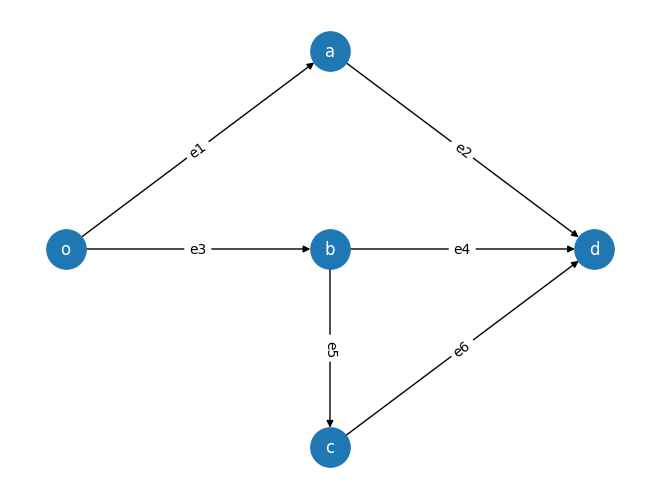

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ('o', 'a'),
    ('o', 'b'),
    ('a', 'd'),
    ('b', 'd'),
    ('b', 'c'),
    ('c', 'd')
])

pos = {
    'o': (40, 20),
    'a': (60, 35),
    'c': (60, 5),
    'd': (80, 20),
    'b': (60, 20)
}

edge_labels = {
    ('o', 'a'): 'e1',
    ('o', 'b'): 'e3',
    ('a', 'd'): 'e2',
    ('b', 'd'): 'e4',
    ('b', 'c'): 'e5',
    ('c', 'd'): 'e6'
}

G['o']['a']['capacity'] = 3
G['o']['b']['capacity'] = 3
G['a']['d']['capacity'] = 2
G['b']['d']['capacity'] = 2
G['b']['c']['capacity'] = 3
G['c']['d']['capacity'] = 1

nx.draw(G, pos, with_labels=True, font_color="white", node_size=800)
nx.draw_networkx_edge_labels(G, pos, font_color='black', edge_labels=edge_labels)
plt.show()

In [11]:
# point a
(tau, min_cut) = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
print(f"tau: {tau}, min cut: {min_cut}")


tau: 5, min cut: ({'b', 'a', 'c', 'o'}, {'d'})


Maximum flow:  (5, {'o': {'a': 2, 'b': 3}, 'a': {'d': 2}, 'b': {'d': 2, 'c': 1}, 'd': {}, 'c': {'d': 1}})


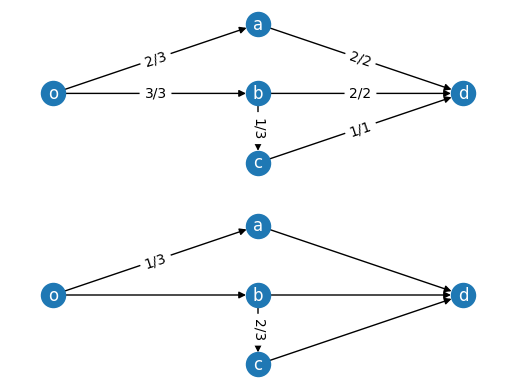

In [12]:
# point b


print("Maximum flow: ", nx.algorithms.flow.maximum_flow(G, 'o', 'd'))

# We used the previous result function to generate such labels
edge_labels = {
    ('o', 'a'): '2/3',
    ('o', 'b'): '3/3',
    ('a', 'd'): '2/2',
    ('b', 'd'): '2/2',
    ('b', 'c'): '1/3',
    ('c', 'd'): '1/1'
}

plt.subplot(211)
nx.draw(G, pos, with_labels=True, font_color="white")
nx.draw_networkx_edge_labels(G, pos, font_color='black', edge_labels=edge_labels)

edge_labels = {('o', 'a'): '1/3', ('b', 'c'): '2/3'}

plt.subplot(212)
nx.draw(G, pos, with_labels=True, font_color="white")
nx.draw_networkx_edge_labels( G, pos, font_color='black', edge_labels=edge_labels)

plt.show()


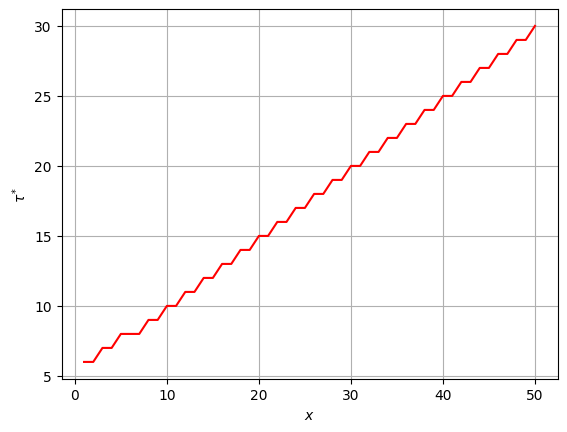

In [13]:
# punto c

G = nx.DiGraph()

G.add_edges_from([
    ('o', 'a'),
    ('o', 'b'),
    ('a', 'd'),
    ('b', 'd'),
    ('b', 'c'),
    ('c', 'd')
])

G['o']['a']['capacity'] = 3
G['o']['b']['capacity'] = 3
G['a']['d']['capacity'] = 2
G['b']['d']['capacity'] = 2
G['b']['c']['capacity'] = 3
G['c']['d']['capacity'] = 1

x = range(1, 51)
taus = []
(tau, min_cut) = nx.algorithms.flow.minimum_cut(G, 'o', 'd')

for i in x:
    u = min_cut[0]
    uc = min_cut[1]
    min_capacity_ln = dict()
    for n1 in u:
        for n2 in uc:
            if n2 in G.successors(n1):
                min_capacity_ln[(n1, n2)] = G[n1][n2]['capacity']
    min_edge = list(min_capacity_ln.keys())[0]
    max_tau = tau
    for key in min_capacity_ln.keys():
      G[key[0]][key[1]]['capacity']+=1
      (tau, min_cut) = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
      if tau >= max_tau:
        min_edge = (key[0],key[1])
        max_tau = tau
      G[key[0]][key[1]]['capacity']-=1
    G[min_edge[0]][min_edge[1]]['capacity'] += 1
    (tau, min_cut) = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
    taus.append(tau)

fig, ax = plt.subplots()
ax.plot(x, taus, 'r')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\tau^{*}$')
ax.grid(True)

plt.show()







###Exercise 2

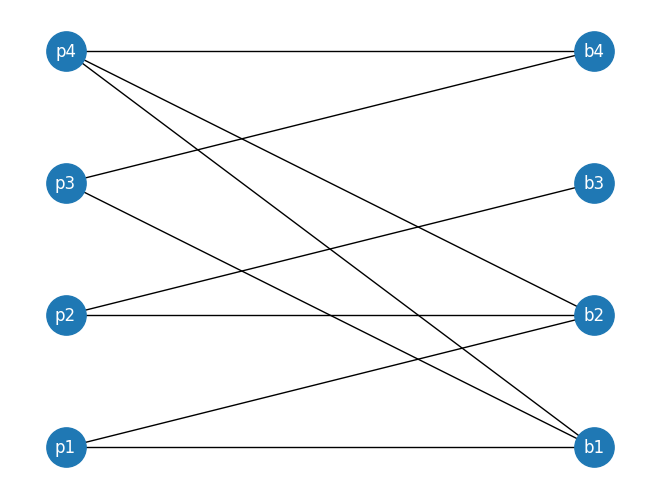

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edges_from([
    ('p1', 'b1'),
    ('p1', 'b2'),
    ('p2', 'b2'),
    ('p2', 'b3'),
    ('p3', 'b1'),
    ('p3', 'b4'),
    ('p4', 'b1'),
    ('p4', 'b2'),
    ('p4', 'b4')
])

pos = {
    'p1': (40, 10),
    'p2': (40, 20),
    'p3': (40, 30),
    'p4': (40, 40),
    'b1': (60, 10),
    'b2': (60, 20),
    'b3': (60, 30),
    'b4': (60, 40)
}

nx.draw(G, pos, with_labels=True, font_color="white", node_size=800)

plt.show()

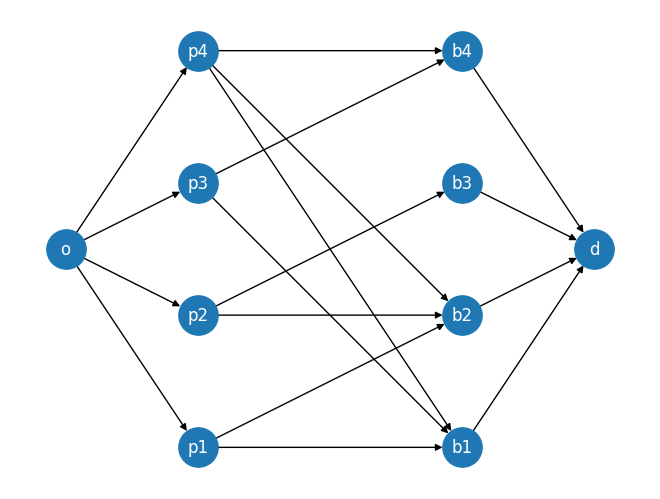

In [15]:
# point a

G2 = G.to_directed()
G2.add_edges_from([
    ('o', 'p1'),
    ('o', 'p2'),
    ('o', 'p3'),
    ('o', 'p4'),
    ('b1', 'd'),
    ('b2', 'd'),
    ('b3', 'd'),
    ('b4', 'd')
])

G2.remove_edges_from([
    ('b1', 'p1'),
    ('b2', 'p2'),
    ('b2', 'p1'),
    ('b2', 'p2'),
    ('b3', 'p2'),
    ('b1', 'p3'),
    ('b4', 'p3'),
    ('b1', 'p4'),
    ('b2', 'p4'),
    ('b4', 'p4')
])

pos2 = {
    'p1': (40, 10),
    'p2': (40, 20),
    'p3': (40, 30),
    'p4': (40, 40),
    'b1': (60, 10),
    'b2': (60, 20),
    'b3': (60, 30),
    'b4': (60, 40),
    'o': (30, 25),
    'd': (70, 25)
}

G2['o']['p1']['capacity'] = 1
G2['o']['p2']['capacity'] = 1
G2['o']['p3']['capacity'] = 1
G2['o']['p4']['capacity'] = 1
G2['b1']['d']['capacity'] = 1
G2['b2']['d']['capacity'] = 1
G2['b3']['d']['capacity'] = 1
G2['b4']['d']['capacity'] = 1

for (n1, n2, cp) in G2.edges.data('capacity'):
    if n1 in ['p1', 'p2', 'p3', 'p4']:
        G2[n1][n2]['capacity']=1000

nx.draw(G2, pos2, with_labels=True, font_color="white", node_size=800)

plt.show()




perfect matching:


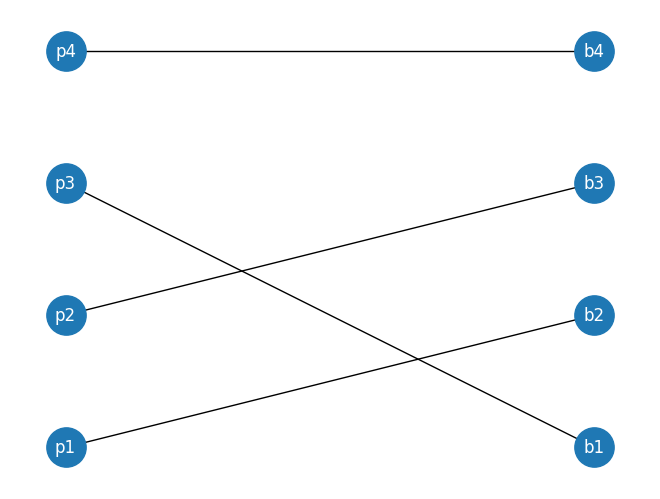

In [16]:
(tau, min_cut) = nx.algorithms.flow.minimum_cut(G2, 'o', 'd')

# Folk-Fulkerson Algorithm

if tau != 4:
    print("no perfect matching is present")
else:
    print("perfect matching:")
    (tau, mf) = nx.algorithms.flow.maximum_flow(G2, 'o', 'd')
    G3 = nx.Graph()
    for n1 in mf:
        if n1 != 'o' and n1 != 'd':
            for adj in mf[n1]:
                if adj != 'o' and adj != 'd' and mf[n1][adj] != 0:
                    G3.add_edge(n1, adj)
    nx.draw(G3, pos, with_labels=True, font_color="white", node_size=800)

{('p1', 'b1'): Text(50.0, 10.0, '0/1'),
 ('p1', 'b2'): Text(50.0, 15.0, '1/1'),
 ('b1', 'd'): Text(65.0, 17.5, '2/2'),
 ('b2', 'd'): Text(65.0, 22.5, '3/3'),
 ('p2', 'b2'): Text(50.0, 20.0, '1/1'),
 ('p2', 'b3'): Text(50.0, 25.0, '1/1'),
 ('b3', 'd'): Text(65.0, 27.5, '1/2'),
 ('p3', 'b1'): Text(50.0, 20.0, '1/1'),
 ('p3', 'b4'): Text(50.0, 35.0, '1/1'),
 ('b4', 'd'): Text(65.0, 32.5, '2/2'),
 ('p4', 'b1'): Text(50.0, 25.0, '1/1'),
 ('p4', 'b2'): Text(50.0, 30.0, '1/1'),
 ('p4', 'b4'): Text(50.0, 40.0, '1/1'),
 ('o', 'p1'): Text(35.0, 17.5, '1/2'),
 ('o', 'p2'): Text(35.0, 22.5, '2/2'),
 ('o', 'p3'): Text(35.0, 27.5, '2/2'),
 ('o', 'p4'): Text(35.0, 32.5, '3/3')}

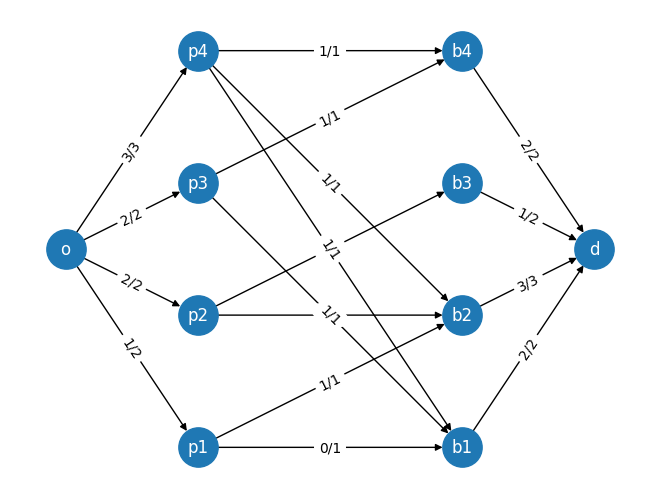

In [17]:
# point b + c

G2['o']['p1']['capacity']= 2
G2['o']['p2']['capacity']= 2
G2['o']['p3']['capacity']= 2
G2['o']['p4']['capacity']= 3

G2['b1']['d']['capacity']= 2
G2['b2']['d']['capacity']= 3
G2['b3']['d']['capacity']= 2
G2['b4']['d']['capacity']= 2

for (n1, n2, cp) in G2.edges.data('capacity'):
    if n1 in ['p1', 'p2', 'p3', 'p4']:
        G2[n1][n2]['capacity']=1
(tau, mf)= nx.algorithms.flow.maximum_flow(G2, 'o', 'd')
edge_labels={}
for n1 in mf:
  for n2 in mf[n1]:
    edge_labels[(n1,n2)]= str(mf[n1][n2])+'/'+str(G2[n1][n2]['capacity'])

nx.draw(G2, pos2, with_labels=True, font_color="white", node_size=800)
nx.draw_networkx_edge_labels( G2, pos2, font_color='black', edge_labels=edge_labels)



### Exercise 3


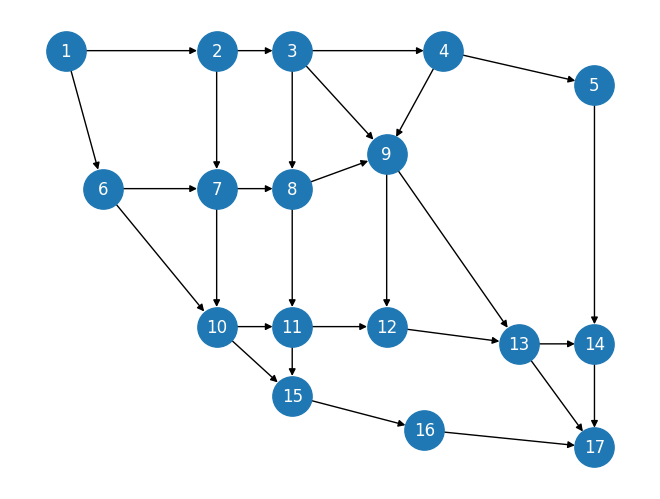

In [18]:
# make sure to upload the data files.

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
import cvxpy as cp

f = sp.io.loadmat('flow.mat')["flow"].reshape(28,)
C = sp.io.loadmat('capacities.mat')["capacities"].reshape(28,)
B = sp.io.loadmat('traffic.mat')["traffic"]
l = sp.io.loadmat('traveltime.mat')["traveltime"].reshape(28,)

G3 = nx.DiGraph()
edge_labels3= {}

for e in range(B.shape[1]):
  adj=[0,0]
  for n in range(B.shape[0]):
    if B[n][e] == 1:
      adj[0] = n
    elif B[n][e] == -1:
      adj[1] = n
  G3.add_edge(adj[0]+1,adj[1]+1)
  G3[adj[0]+1][adj[1]+1]['weight'] = l[e]
  G3[adj[0]+1][adj[1]+1]['capacity'] = C[e]
  edge_labels3[(adj[0],adj[1])] = 'e'+str(e+1)

pos = {
    1: (0, 50),
    2: (20, 50),
    3: (30, 50),
    4: (50, 50),
    5: (70, 45),
    6: (5, 30),
    7: (20, 30),
    8: (30, 30),
    9: (42.5, 35),
    10: (20, 10),
    11: (30, 10),
    12: (42.5, 10),
    13: (60, 7.5),
    14: (70, 7.5),
    15: (30, 0),
    16: (47.5, -5),
    17: (70, -7.5)
}



nx.draw(G3, pos, with_labels=True, font_color="white", node_size=800)
# TODO Change shape
# https://networkx.org/documentation/stable/reference/drawing.html

In [19]:
# point a

# shortest path with flow optimization in cvxpy

n_edges=B.shape[1]
n_nodes=B.shape[0]
nu= np.zeros((n_nodes,))
nu[0]=1
nu[-1]=-1
temp=np.ones((17,28))

flow= cp.Variable(n_edges)
objective= cp.Minimize(l.T @ flow)
constraints= [ B @ flow == nu, flow>=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()
sp=[]
for i in range(len(flow.value)):
  if flow.value[i] > 0.999:
    sp.append('e'+str(i+1))
print("nodes in the shortest path computed by CVXPY:\n\n",sp)

nodes in the shortest path computed by CVXPY:

 ['e1', 'e2', 'e9', 'e12', 'e25']


In [20]:
# shortest path with Networkx function (proof that the two methods return the same result)

sp2= nx.shortest_path(G3,1,17,'weight')
print("nodes in the shortest path computed by NetworkX:\n\n",sp2)

nodes in the shortest path computed by NetworkX:

 [1, 2, 3, 9, 13, 17]


In [21]:
# point b

(tau, mf) = nx.algorithms.flow.maximum_flow(G3, 1, 17)
print(mf)
print('\n\nmaximum flow:', tau)

{1: {2: 8741, 6: 13707}, 2: {3: 8741, 7: 0}, 3: {4: 0, 8: 0, 9: 8741}, 4: {5: 0, 9: 0}, 5: {14: 0}, 6: {7: 4624, 10: 9083}, 7: {8: 4624, 10: 0}, 8: {9: 4624, 11: 0}, 9: {13: 6297, 12: 7068}, 13: {14: 3835, 17: 10355}, 14: {17: 3835}, 10: {11: 825, 15: 8258}, 11: {12: 825, 15: 0}, 15: {16: 8258}, 12: {13: 7893}, 17: {}, 16: {17: 8258}}


maximum flow: 22448


In [22]:
# point c

v = B @ f

print("exogenous flow vector:\n\n",v)
# sanity check: all elements of v sums to 0
sum=0
for el in v:
  sum+=el

print("\nsum of elements of v: ",sum)

exogenous flow vector:

 [ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]

sum of elements of v:  0


In [23]:
# point d

flows = cp.Variable(n_edges)

obj= cp.multiply(cp.multiply(C,l),cp.inv_pos(1-cp.multiply(flows,1/C)))-cp.multiply(C,l)

objective = cp.Minimize(cp.sum(obj))
nu = np.zeros((17,))
nu[0] = 16282
nu[-1] = -16282
constraints = [ B @ flows == nu, flows>=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print("social optimum flow:\n", flows.value)
fstar = flows.value

social optimum flow:
 [6.45413244e+03 5.91951309e+03 2.99521607e+03 2.99521399e+03
 9.82786756e+03 4.49706077e+03 2.89732663e+03 2.43600230e+03
 3.04736049e+03 5.34619348e+02 2.33693727e-02 2.92427365e+03
 2.07688030e-03 2.99521399e+03 5.33080679e+03 2.73085467e+03
 4.73430561e+03 2.13435349e+03 4.61347705e+02 2.31291754e+03
 3.19220011e+03 5.50511764e+03 2.31057919e+03 2.26487352e-03
 6.24189894e+03 5.30579319e+03 4.73430787e+03 4.73430787e+03]


In [24]:
# point e
import scipy as sp

flows = cp.Variable(n_edges)
obj=0
for i in range(28):
  obj += -(C[i]*l[i]*cp.log(1-(flows[i]/C[i])))
objective = cp.Minimize(cp.sum(obj))
nu= np.zeros((17,))
nu[0]=16282
nu[-1]=-16282
constraints = [ B @ flows == nu, flows>=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print("Wardrop equilibrium:\n",flows.value)

Wardrop equilibrium:
 [6.53248376e+03 6.53248350e+03 2.20678748e+03 2.20678743e+03
 9.74951620e+03 4.49336693e+03 2.71426774e+03 2.20385945e+03
 3.34278634e+03 2.63674275e-04 1.88855724e+02 4.13684030e+03
 4.44865186e-05 2.20678743e+03 5.25614927e+03 2.24738236e+03
 4.78786636e+03 1.77909945e+03 6.99264014e+02 2.99791346e+03
 2.94664631e+03 5.94455977e+03 2.50794077e+03 6.19467518e-05
 6.77940534e+03 4.71472820e+03 4.78786643e+03 4.78786643e+03]


In [25]:
# point f

flows = cp.Variable(n_edges)
obj=0
for i in range(28):
  tau= C[i]*l[i]/(C[i]-fstar[i])**2
  w= fstar[i]* tau
  obj += (-(C[i]*l[i]*cp.log(1-(flows[i]/C[i])))+w*flows[i])
objective = cp.Minimize(obj)
nu= np.zeros((17,))
nu[0]=16282
nu[-1]=-16282
constraints = [ B @ flows == nu, flows>=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print("Wardrop equilibrium with tolls:\n",flows.value)

Wardrop equilibrium with tolls:
 [6.45403281e+03 5.91917481e+03 2.99543409e+03 2.99543402e+03
 9.82796712e+03 4.49711434e+03 2.89764345e+03 2.43596652e+03
 3.04726122e+03 5.34857999e+02 3.16772122e-04 2.92374040e+03
 6.65267070e-05 2.99543402e+03 5.33085278e+03 2.73088365e+03
 4.73429802e+03 2.13432889e+03 4.61677250e+02 2.31244576e+03
 3.19256081e+03 5.50500657e+03 2.31046294e+03 8.60865914e-05
 6.24180486e+03 5.30589696e+03 4.73429810e+03 4.73429810e+03]


In [26]:
# point g

flows = cp.Variable(n_edges)
obj= cp.multiply(cp.multiply(C,l),cp.inv_pos(1-cp.multiply(flows,1/C)))-cp.multiply(C,l)-cp.multiply(flows,l)
objective = cp.Minimize(cp.sum(obj))
nu= np.zeros((17,))
nu[0]=16282
nu[-1]=-16282
constraints = [ B @ flows == nu, flows>=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print("social optimum flow:\n\n",flows.value)
fstar= flows.value

flowsW = cp.Variable(n_edges)
obj=0
for i in range(28):
  w= fstar[i]* (C[i]*l[i]/(C[i]-fstar[i])**2)-l[i]
  obj += (-(C[i]*l[i]*cp.log(1-(flowsW[i]/C[i])))+w*flowsW[i])
objective = cp.Minimize(obj)
constraints = [ B @ flowsW == nu, flowsW>=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print("\nWardrop equilibrium with tolls:\n\n",flowsW.value)

social optimum flow:

 [6.46809217e+03 5.61773555e+03 3.29769367e+03 3.29768171e+03
 9.81390783e+03 4.50158117e+03 3.00293310e+03 2.56427919e+03
 2.91777669e+03 8.50356614e+02 2.08434100e-02 2.32002104e+03
 1.19593596e-02 3.29768171e+03 5.31232667e+03 2.93160156e+03
 4.72972979e+03 2.34900468e+03 4.38674749e+02 1.96653550e+03
 3.37027250e+03 5.33680800e+03 2.14286457e+03 3.80367843e-03
 6.11172012e+03 5.44054629e+03 4.72973360e+03 4.72973360e+03]

Wardrop equilibrium with tolls:

 [6.46808645e+03 5.61859814e+03 3.29731020e+03 3.29730927e+03
 9.81391339e+03 4.50161236e+03 3.00250902e+03 2.56379914e+03
 2.91794392e+03 8.49488310e+02 1.50264139e-03 2.32128644e+03
 9.28476720e-04 3.29730927e+03 5.31230103e+03 2.93120598e+03
 4.72968670e+03 2.34859165e+03 4.38711380e+02 1.96714259e+03
 3.36991700e+03 5.33705958e+03 2.14316481e+03 3.61410428e-04
 6.11183869e+03 5.44047409e+03 4.72968707e+03 4.72968707e+03]
